In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection  import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#read data

df = pd.read_csv('./insurance_data.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
#check for missing values 
def missing_values(df):
    null_v = df.isnull().sum().sort_values(ascending=False)
    null_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    null_v = pd.concat([null_v, null_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return null_v

missing_values(df)

,Missing_Number,Missing_Percent
charges,0,0.0
region,0,0.0
smoker,0,0.0
children,0,0.0
bmi,0,0.0
sex,0,0.0
age,0,0.0


In [5]:
#check for duplicated rows

df.duplicated().sum()

1

In [6]:
#showing duplicated rows
df[df.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [7]:
#dropping the duplicated rows 
df=df.drop_duplicates(keep="first")

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
#check data description
df.describe().T.style.bar()

,count,mean,std,min,25%,50%,75%,max
age,1337.000000,39.222139,14.044333,18.000000,27.000000,39.000000,51.000000,64.000000
bmi,1337.000000,30.663452,6.100468,15.960000,26.290000,30.400000,34.700000,53.130000
children,1337.000000,1.095737,1.205571,0.000000,0.000000,1.000000,2.000000,5.000000
charges,1337.000000,13279.121487,12110.359656,1121.873900,4746.344000,9386.161300,16657.717450,63770.428010


In [11]:
#locating row that has the max price 
df.loc[df['charges'] == 63770.428010]


,age,sex,bmi,children,smoker,region,charges
543,54,female,47.41,0,yes,southeast,63770.42801


In [12]:
#locating row that has the max BMI
df.loc[df['bmi'] == 53.130000]

,age,sex,bmi,children,smoker,region,charges
1317,18,male,53.13,0,no,southeast,1163.4627


In [13]:
#locating row that show people who have max children of 5
df.loc[df['children'] == 5.000000]

,age,sex,bmi,children,smoker,region,charges
32,19,female,28.600,5,no,southwest,4687.79700
71,31,male,28.500,5,no,northeast,6799.45800
166,20,female,37.000,5,no,southwest,4830.63000
413,25,male,23.900,5,no,southwest,5080.09600
425,45,male,24.310,5,no,southeast,9788.86590
438,52,female,46.750,5,no,southeast,12592.53450
568,49,female,31.900,5,no,southwest,11552.90400
640,33,male,42.400,5,no,southwest,6666.24300
877,33,male,33.440,5,no,southeast,6653.78860
932,46,male,25.800,5,no,southwest,10096.97000


In [14]:
#check the correlation between charges and each of columns
df.corr()["charges"]

age         0.298308
bmi         0.198401
children    0.067389
charges     1.000000
Name: charges, dtype: float64

<AxesSubplot:xlabel='sex', ylabel='count'>

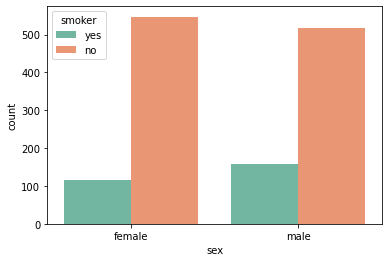

In [26]:
#analysis sex vs smoker columns combinely 
sns.countplot(df["sex"],hue=df["smoker"],palette="Set23")